<a href="https://colab.research.google.com/github/Vargol/StableDiffusionColabs/blob/main/SDXL/cm_lora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install --quiet --upgrade diffusers transformers accelerate mediapy

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

The config attributes {'skip_prk_steps': True} were passed to LCMScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.


  0%|          | 0/4 [00:00<?, ?it/s]

""

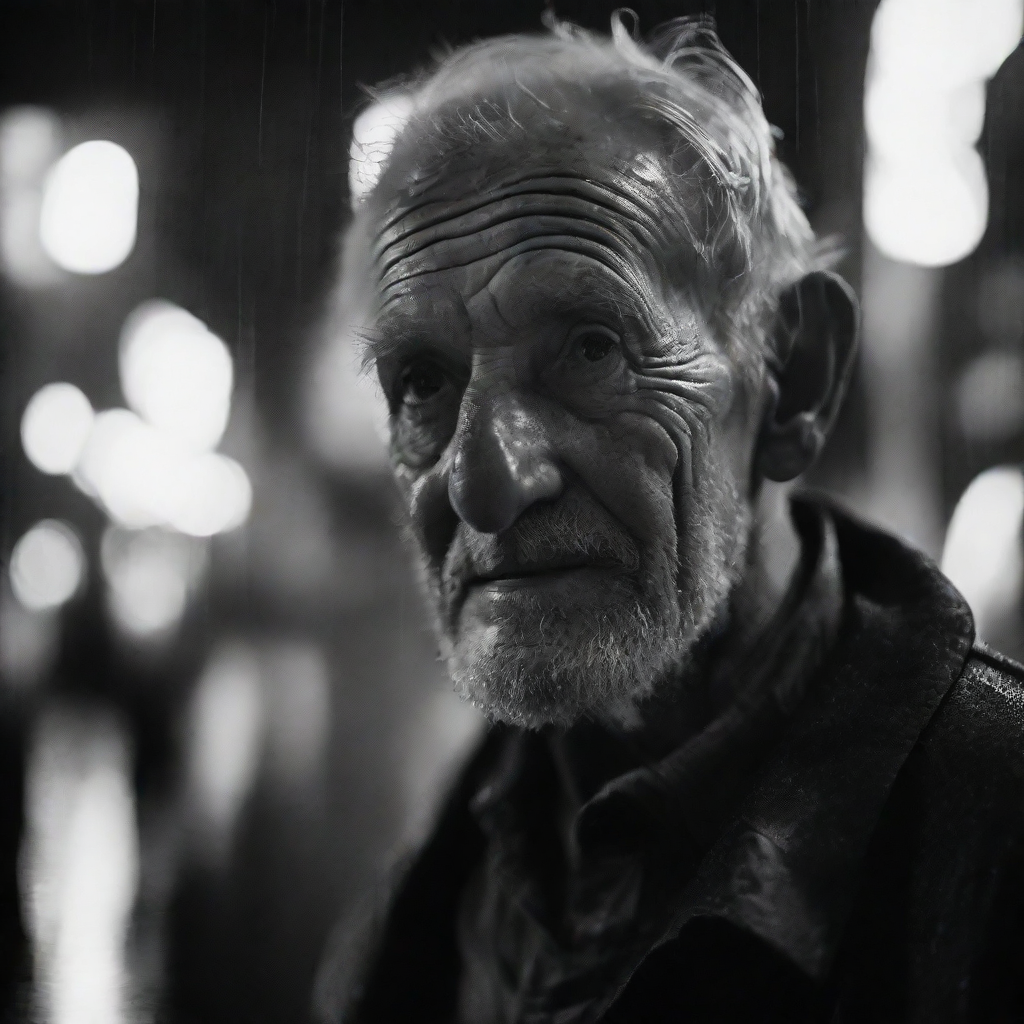

In [2]:
from diffusers import DiffusionPipeline, LCMScheduler
import torch
import mediapy

model_id = "stabilityai/stable-diffusion-xl-base-1.0"
lcm_lora_id = "latent-consistency/lcm-lora-sdxl"

pipe = DiffusionPipeline.from_pretrained(model_id, variant="fp16", torch_dtype=torch.float16)

pipe.load_lora_weights(lcm_lora_id, torch_dtype=torch.float16)
pipe.scheduler = LCMScheduler.from_config(pipe.scheduler.config, torch_dtype=torch.float16)
pipe.to(device="cuda", dtype=torch.float16)

prompt = "close-up photography of old man standing in the rain at night, in a street lit by lamps, leica 35mm summilux"
images = pipe(
    prompt=prompt,
    num_inference_steps=4,
    guidance_scale=1,
).images[0]

mediapy.show_image(images)